In [454]:
import pandas as pd
import numpy as np

# Task 1

In [455]:
# Load the dataset
df = pd.read_csv('messed_dataset.csv')
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


In [456]:
df['ID'] = np.arange(len(df)) + 1
print(df)

                  Name   Age                     Email            Country  \
0              invalid  59.0       ycastro@example.org        Switzerland   
1      David Jefferson  21.0                       NaN              China   
2        Jessica Reyes  34.0                       NaN                NaN   
3    Kenneth Macdonald  68.0         ewolf@example.com              Italy   
4          Julie Horne  78.0                       NaN            Ecuador   
..                 ...   ...                       ...                ...   
95    Garrett Davidson  56.0        gjames@example.com    Solomon Islands   
96      Elizabeth Ross  52.0  richardlewis@example.net  Equatorial Guinea   
97                 NaN  72.0       brian50@example.com            Somalia   
98      Patricia Singh  65.0      lramirez@example.org             Greece   
99  Christopher Stokes  42.0                       NaN       South Africa   

      Salary DateOfJoining   ID  
0   44694.24    2022-09-29    1  
1      

# Task 2

- Basic Data Cleaning

In [457]:
# Your code goes here
df.describe()

,ID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [458]:
df['Name']

0                invalid
1        David Jefferson
2          Jessica Reyes
3      Kenneth Macdonald
4            Julie Horne
             ...        
95      Garrett Davidson
96        Elizabeth Ross
97                   NaN
98        Patricia Singh
99    Christopher Stokes
Name: Name, Length: 100, dtype: object

In [459]:
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining,ID
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,1
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,2
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24,3
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,4
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,5


In [460]:
df.isna().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
ID                0
dtype: int64

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
 6   ID             100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [462]:
df.isna().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
ID                0
dtype: int64

In [463]:
df.shape

(100, 7)

In [464]:
#Getting summary stastocs data
df.describe()

,ID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [465]:
# Summary statistical of categorical
df.describe(include=['object'])

,Name,Age,Email,Country,Salary,DateOfJoining
count,89,97,80,86,94,79
unique,85,53,80,76,93,79
top,invalid,76.0,ycastro@example.org,China,invalid,2022-09-29
freq,5,6,1,2,2,1


In [466]:
df.describe()

,ID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [467]:
df['Age'].isnull().sum()

np.int64(3)

In [468]:
x=df['Age']

In [469]:
print(x)

0     59.0
1     21.0
2     34.0
3     68.0
4     78.0
      ... 
95    56.0
96    52.0
97    72.0
98    65.0
99    42.0
Name: Age, Length: 100, dtype: object


In [470]:
df['Age'].isnull().sum()


np.int64(3)

In [471]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [472]:
# Verify conversion
print(df['Age'].dtype)
print(df['Age'].isna().sum())

float64
4


In [473]:
df['Age'].fillna(df['Age'].median())

0     59.0
1     21.0
2     34.0
3     68.0
4     78.0
      ... 
95    56.0
96    52.0
97    72.0
98    65.0
99    42.0
Name: Age, Length: 100, dtype: float64

In [474]:
# Fill missing values in the 'Age' column with the mean of the 
most_frequent_country=df['Country'].mode(1)



In [475]:
print(most_frequent_country)

0    British Indian Ocean Territory (Chagos Archipe...
1                                                China
2                                              Ecuador
3                                               Greece
4                                                Korea
5                                               Mexico
6                                 Netherlands Antilles
7                                         South Africa
8                                                Sudan
9                                                Yemen
Name: Country, dtype: object


In [476]:
df['Country'].fillna(most_frequent_country, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\2046589715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna(most_frequent_country, inplace=True)


In [477]:
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining,ID
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,1
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,2
2,Jessica Reyes,34.0,NaN,Ecuador,60511.62,2022-05-24,3
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,4
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,5


In [478]:
print(df['Age'].isna().sum())

4


In [479]:
df.isnull().sum()

Name             11
Age               4
Email            20
Country          11
Salary            6
DateOfJoining    21
ID                0
dtype: int64

In [480]:
df.head()

,Name,Age,Email,Country,Salary,DateOfJoining,ID
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,1
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,2
2,Jessica Reyes,34.0,NaN,Ecuador,60511.62,2022-05-24,3
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,4
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,5


In [481]:
df.dropna(inplace=True)

In [482]:
df.shape

(49, 7)

In [483]:
df.isnull().sum()

Name             0
Age              0
Email            0
Country          0
Salary           0
DateOfJoining    0
ID               0
dtype: int64

# Task 3 
- Data Analysis. Analyse the data by giving the summary statistics, and more information about the data


In [484]:
df.shape

(49, 7)

In [485]:
# Your code goes here
df.describe()

,Age,ID
count,49.000000,49.000000
mean,54.428571,57.020408
std,17.639917,30.379194
min,19.000000,1.000000
25%,42.000000,30.000000
50%,57.000000,62.000000
75%,70.000000,84.000000
max,80.000000,99.000000


In [486]:
# Assuming 'cleaned_data' is your DataFrame

# Select the first 5 rows by index
first_five_rows = df.iloc[:5]
print(first_five_rows)


                Name   Age                      Email      Country    Salary  \
0            invalid  59.0        ycastro@example.org  Switzerland  44694.24   
3  Kenneth Macdonald  68.0          ewolf@example.com        Italy  84223.29   
5   Jonathan Holland  26.0   mayercaitlin@example.org     Cameroon  25660.99   
7   Kimberly Roberts  76.0        lmiller@example.org  Netherlands  58550.56   
9        Jason Perez  59.0  collinsedward@example.com      Myanmar  20175.11   

  DateOfJoining  ID  
0    2022-09-29   1  
3    2022-04-07   4  
5    2023-05-01   6  
7    2023-07-08   8  
9    2024-04-11  10  


In [487]:
# Select multiple columns 'Name' and 'Salary'
selected_columns = df[['Name', 'Salary']]
print(selected_columns)


                      Name    Salary
0                  invalid  44694.24
3        Kenneth Macdonald  84223.29
5         Jonathan Holland  25660.99
7         Kimberly Roberts  58550.56
9              Jason Perez  20175.11
10           Olivia Strong  72362.02
13          Jessica Rivera  71261.36
15           Lauren Becker   invalid
20           Dylan Simpson   59670.5
23              Karen Ward   83580.8
24              Amy Henson  35390.77
28           Ricardo Moody  83514.58
29          Stephanie Moss  35671.38
35           Rebecca Davis  66871.64
36         Keith Velazquez  81661.97
37      Christopher Martin  81367.57
40                 invalid   25219.6
44            Brandi White  21408.87
49           Amber Mendoza  47293.85
51          Whitney Graham  98826.59
52       Patrick Brown PhD   83842.6
58  Dr. Olivia Caldwell MD  78453.84
59             Diane Smith  86579.95
60          Thomas Navarro  86286.69
61          Terri Phillips  47755.97
64           Andrew Bryant  32205.53
6

In [488]:
# Select the rows with index positions 10 to 15
specific_rows_by_index = df.iloc[10:16]
print(specific_rows_by_index)


                  Name   Age                        Email  \
24          Amy Henson  80.0       tylerwatts@example.org   
28       Ricardo Moody  76.0         xmorales@example.net   
29      Stephanie Moss  61.0         qvaughan@example.com   
35       Rebecca Davis  35.0  wallacejennifer@example.net   
36     Keith Velazquez  22.0        charles82@example.net   
37  Christopher Martin  40.0           tina11@example.com   

                   Country    Salary DateOfJoining  ID  
24  Bosnia and Herzegovina  35390.77    2023-12-11  25  
28                 Bahrain  83514.58    2024-03-29  29  
29                Guernsey  35671.38    2021-11-22  30  
35               Sri Lanka  66871.64    2022-08-06  36  
36            Burkina Faso  81661.97    2024-03-27  37  
37    Netherlands Antilles  81367.57    2020-07-30  38  


In [489]:
# Select the first 5 rows by index
first_five_rows = df.iloc[:5]
print(first_five_rows)


                Name   Age                      Email      Country    Salary  \
0            invalid  59.0        ycastro@example.org  Switzerland  44694.24   
3  Kenneth Macdonald  68.0          ewolf@example.com        Italy  84223.29   
5   Jonathan Holland  26.0   mayercaitlin@example.org     Cameroon  25660.99   
7   Kimberly Roberts  76.0        lmiller@example.org  Netherlands  58550.56   
9        Jason Perez  59.0  collinsedward@example.com      Myanmar  20175.11   

  DateOfJoining  ID  
0    2022-09-29   1  
3    2022-04-07   4  
5    2023-05-01   6  
7    2023-07-08   8  
9    2024-04-11  10  


In [490]:
selected_columns=df[['Name', 'Age' ,'Email']]
print(selected_columns)


                      Name   Age                        Email
0                  invalid  59.0          ycastro@example.org
3        Kenneth Macdonald  68.0            ewolf@example.com
5         Jonathan Holland  26.0     mayercaitlin@example.org
7         Kimberly Roberts  76.0          lmiller@example.org
9              Jason Perez  59.0    collinsedward@example.com
10           Olivia Strong  76.0  schultzpatricia@example.com
13          Jessica Rivera  73.0        fmitchell@example.net
15           Lauren Becker  30.0    watsonjeffrey@example.net
20           Dylan Simpson  46.0        jessica74@example.net
23              Karen Ward  56.0         daniel47@example.com
24              Amy Henson  80.0       tylerwatts@example.org
28           Ricardo Moody  76.0         xmorales@example.net
29          Stephanie Moss  61.0         qvaughan@example.com
35           Rebecca Davis  35.0  wallacejennifer@example.net
36         Keith Velazquez  22.0        charles82@example.net
37      

In [491]:
df.describe()

,Age,ID
count,49.000000,49.000000
mean,54.428571,57.020408
std,17.639917,30.379194
min,19.000000,1.000000
25%,42.000000,30.000000
50%,57.000000,62.000000
75%,70.000000,84.000000
max,80.000000,99.000000


In [492]:
df['Age'].median()

np.float64(57.0)

In [493]:
df['Salary'].quantile


<bound method Series.quantile of 0     44694.24
3     84223.29
5     25660.99
7     58550.56
9     20175.11
10    72362.02
13    71261.36
15     invalid
20     59670.5
23     83580.8
24    35390.77
28    83514.58
29    35671.38
35    66871.64
36    81661.97
37    81367.57
40     25219.6
44    21408.87
49    47293.85
51    98826.59
52     83842.6
58    78453.84
59    86579.95
60    86286.69
61    47755.97
64    32205.53
68    28951.24
69    62929.05
70    73916.51
72    28583.22
73    57795.75
74    68794.39
78    98396.21
80    89683.17
81    30773.53
82    99507.66
83    34369.87
84    39875.14
85    69624.01
86    43013.14
87     29455.0
88     invalid
89    42435.96
91    78048.75
92    49354.13
93    52834.29
94    55583.62
96    29992.69
98    85290.44
Name: Salary, dtype: object>

In [494]:
df['Email'].count()

np.int64(49)

## Task 5: Data Operations

In [495]:
#Add a new column to the DataFrame.
df['Bonus'] = df['Salary'] 
print(df['Bonus'])


0     44694.24
3     84223.29
5     25660.99
7     58550.56
9     20175.11
10    72362.02
13    71261.36
15     invalid
20     59670.5
23     83580.8
24    35390.77
28    83514.58
29    35671.38
35    66871.64
36    81661.97
37    81367.57
40     25219.6
44    21408.87
49    47293.85
51    98826.59
52     83842.6
58    78453.84
59    86579.95
60    86286.69
61    47755.97
64    32205.53
68    28951.24
69    62929.05
70    73916.51
72    28583.22
73    57795.75
74    68794.39
78    98396.21
80    89683.17
81    30773.53
82    99507.66
83    34369.87
84    39875.14
85    69624.01
86    43013.14
87     29455.0
88     invalid
89    42435.96
91    78048.75
92    49354.13
93    52834.29
94    55583.62
96    29992.69
98    85290.44
Name: Bonus, dtype: object


In [496]:
# Rename columns: 'Name' to 'Employee Name' and 'Country' to 'Employee Country'
df.rename(columns={'Name': 'Employee Name', 'Country': 'Employee Country'}, inplace=True)
print(df.head())


       Employee Name   Age                      Email Employee Country  \
0            invalid  59.0        ycastro@example.org      Switzerland   
3  Kenneth Macdonald  68.0          ewolf@example.com            Italy   
5   Jonathan Holland  26.0   mayercaitlin@example.org         Cameroon   
7   Kimberly Roberts  76.0        lmiller@example.org      Netherlands   
9        Jason Perez  59.0  collinsedward@example.com          Myanmar   

     Salary DateOfJoining  ID     Bonus  
0  44694.24    2022-09-29   1  44694.24  
3  84223.29    2022-04-07   4  84223.29  
5  25660.99    2023-05-01   6  25660.99  
7  58550.56    2023-07-08   8  58550.56  
9  20175.11    2024-04-11  10  20175.11  


In [497]:
# Delete the column 'Email'
df.drop(columns=['Bonus'], inplace=True)
print(df.head())


       Employee Name   Age                      Email Employee Country  \
0            invalid  59.0        ycastro@example.org      Switzerland   
3  Kenneth Macdonald  68.0          ewolf@example.com            Italy   
5   Jonathan Holland  26.0   mayercaitlin@example.org         Cameroon   
7   Kimberly Roberts  76.0        lmiller@example.org      Netherlands   
9        Jason Perez  59.0  collinsedward@example.com          Myanmar   

     Salary DateOfJoining  ID  
0  44694.24    2022-09-29   1  
3  84223.29    2022-04-07   4  
5  25660.99    2023-05-01   6  
7  58550.56    2023-07-08   8  
9  20175.11    2024-04-11  10  


In [498]:
df['Age'] = pd.to_numeric(df['Salary'], errors='coerce')

In [499]:
# Define a function to categorize employees based on age
import math
def age_category(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to the 'Age' column and create a new column 'Age Category'
df['Age_category'] = df['Age'].apply(age_category)
print(df.head())


       Employee Name       Age                      Email Employee Country  \
0            invalid  44694.24        ycastro@example.org      Switzerland   
3  Kenneth Macdonald  84223.29          ewolf@example.com            Italy   
5   Jonathan Holland  25660.99   mayercaitlin@example.org         Cameroon   
7   Kimberly Roberts  58550.56        lmiller@example.org      Netherlands   
9        Jason Perez  20175.11  collinsedward@example.com          Myanmar   

     Salary DateOfJoining  ID Age_category  
0  44694.24    2022-09-29   1       Senior  
3  84223.29    2022-04-07   4       Senior  
5  25660.99    2023-05-01   6       Senior  
7  58550.56    2023-07-08   8       Senior  
9  20175.11    2024-04-11  10       Senior  


# TASK 6:GroupBy Operations


In [500]:
# Group the DataFrame by 'Age Category' and calculate summary statistics for 'Salary'
grouped_data = df.groupby('Age')['Salary'].describe()
print(grouped_data)


         count unique       top freq
Age                                 
20175.11     1      1  20175.11    1
21408.87     1      1  21408.87    1
25219.60     1      1   25219.6    1
25660.99     1      1  25660.99    1
28583.22     1      1  28583.22    1
28951.24     1      1  28951.24    1
29455.00     1      1   29455.0    1
29992.69     1      1  29992.69    1
30773.53     1      1  30773.53    1
32205.53     1      1  32205.53    1
34369.87     1      1  34369.87    1
35390.77     1      1  35390.77    1
35671.38     1      1  35671.38    1
39875.14     1      1  39875.14    1
42435.96     1      1  42435.96    1
43013.14     1      1  43013.14    1
44694.24     1      1  44694.24    1
47293.85     1      1  47293.85    1
47755.97     1      1  47755.97    1
49354.13     1      1  49354.13    1
52834.29     1      1  52834.29    1
55583.62     1      1  55583.62    1
57795.75     1      1  57795.75    1
58550.56     1      1  58550.56    1
59670.50     1      1   59670.5    1
6

In [501]:
grouped_data = df.groupby('Age')
print(grouped_data)

In [502]:
for group_name, group_data in grouped_data:
    print(f"Group: {group_name}")
    print(group_data)
    print("\n")  # Adding a newline for better readability

Group: 20175.11
  Employee Name       Age                      Email Employee Country  \
9   Jason Perez  20175.11  collinsedward@example.com          Myanmar   

     Salary DateOfJoining  ID Age_category  
9  20175.11    2024-04-11  10       Senior  


Group: 21408.87
   Employee Name       Age              Email Employee Country    Salary  \
44  Brandi White  21408.87  mhall@example.net         Tanzania  21408.87   

   DateOfJoining  ID Age_category  
44    2020-11-26  45       Senior  


Group: 25219.6
   Employee Name      Age                 Email  \
40       invalid  25219.6  mjackson@example.org   

                                     Employee Country   Salary DateOfJoining  \
40  British Indian Ocean Territory (Chagos Archipe...  25219.6    2024-02-14   

    ID Age_category  
40  41       Senior  


Group: 25660.99
      Employee Name       Age                     Email Employee Country  \
5  Jonathan Holland  25660.99  mayercaitlin@example.org         Cameroon   

     Sal

## Task 7: Merging and Joining DataFrames

In [503]:
df1=pd.read_csv('Sampledata.csv')


In [504]:
df1.rename(columns={'SalesMan': 'Employee Name'}, inplace=True)
print(df1)

   OrderDate   Region  Manager Employee Name          Item  Units  \
0     1/6/18     East   Martha     Alexander    Television   95.0   
1    1/23/18  Central  Hermann        Shelli  Home Theater   50.0   
2     2/9/18  Central  Hermann          Luis    Television   36.0   
3    2/26/18  Central  Timothy         David    Cell Phone   27.0   
4    3/15/18     West  Timothy       Stephen    Television   56.0   
5     4/1/18     East   Martha     Alexander  Home Theater   60.0   
6    4/18/18  Central   Martha        Steven    Television   75.0   
7     5/5/18  Central  Hermann          Luis    Television   90.0   
8    5/22/18     West  Douglas       Michael    Television   32.0   
9     6/8/18     East   Martha     Alexander  Home Theater   60.0   
10   6/25/18  Central  Hermann         Sigal    Television   90.0   
11   7/12/18     East   Martha         Diana  Home Theater   29.0   
12   7/29/18     East  Douglas         Karen  Home Theater   81.0   
13   8/15/18     East   Martha    

In [505]:
df1['ID'] = np.arange(len(df1)) + 1

In [506]:
 # 'how' can be 'inner', 'outer', 'left', 'right'print(df1)
result = pd.merge(df1, df, left_index=True, right_index=True)
print(result)

   OrderDate   Region  Manager Employee Name_x          Item  Units  \
0     1/6/18     East   Martha       Alexander    Television   95.0   
3    2/26/18  Central  Timothy           David    Cell Phone   27.0   
5     4/1/18     East   Martha       Alexander  Home Theater   60.0   
7     5/5/18  Central  Hermann            Luis    Television   90.0   
9     6/8/18     East   Martha       Alexander  Home Theater   60.0   
10   6/25/18  Central  Hermann           Sigal    Television   90.0   
13   8/15/18     East   Martha       Alexander    Television   35.0   
15   9/18/18     East   Martha       Alexander   Video Games   16.0   
20  12/12/18  Central  Douglas            John    Television   67.0   
23    2/1/19  Central  Douglas            John  Home Theater   87.0   
24   2/18/19     East   Martha       Alexander  Home Theater    4.0   
28   4/27/19     East   Martha           Diana    Cell Phone   96.0   
29   5/14/19  Central  Timothy           David    Television   53.0   
35   8

In [507]:
result

,OrderDate,Region,Manager,Employee Name_x,Item,Units,Unit_price,Sale_amt,ID_x,Employee Name_y,Age,Email,Employee Country,Salary,DateOfJoining,ID_y,Age_category
0,1/6/18,East,Martha,Alexander,Television,95.0,"1,198.00","113,810.00",1,invalid,44694.24,ycastro@example.org,Switzerland,44694.24,2022-09-29,1,Senior
3,2/26/18,Central,Timothy,David,Cell Phone,27.0,225.00,"6,075.00",4,Kenneth Macdonald,84223.29,ewolf@example.com,Italy,84223.29,2022-04-07,4,Senior
5,4/1/18,East,Martha,Alexander,Home Theater,60.0,500.00,"30,000.00",6,Jonathan Holland,25660.99,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,6,Senior
7,5/5/18,Central,Hermann,Luis,Television,90.0,"1,198.00","107,820.00",8,Kimberly Roberts,58550.56,lmiller@example.org,Netherlands,58550.56,2023-07-08,8,Senior
9,6/8/18,East,Martha,Alexander,Home Theater,60.0,500.00,"30,000.00",10,Jason Perez,20175.11,collinsedward@example.com,Myanmar,20175.11,2024-04-11,10,Senior
10,6/25/18,Central,Hermann,Sigal,Television,90.0,"1,198.00","107,820.00",11,Olivia Strong,72362.02,schultzpatricia@example.com,South Africa,72362.02,2023-07-27,11,Senior
13,8/15/18,East,Martha,Alexander,Television,35.0,"1,198.00","41,930.00",14,Jessica Rivera,71261.36,fmitchell@example.net,Central African Republic,71261.36,2021-05-18,14,Senior
15,9/18/18,East,Martha,Alexander,Video Games,16.0,58.50,936.00,16,Lauren Becker,NaN,watsonjeffrey@example.net,Malta,invalid,2020-01-13,16,Senior
20,12/12/18,Central,Douglas,John,Television,67.0,"1,198.00","80,266.00",21,Dylan Simpson,59670.50,jessica74@example.net,Serbia,59670.5,2021-10-31,21,Senior
23,2/1/19,Central,Douglas,John,Home Theater,87.0,500.00,"43,500.00",24,Karen Ward,83580.80,daniel47@example.com,Congo,83580.8,2022-04-09,24,Senior


## Task 8: Working with Dates and Times

In [508]:
# Convert 'Date' column to datetime format
result['OrderDate'] = pd.to_datetime(result['OrderDate'])
print(result)

    OrderDate   Region  Manager Employee Name_x          Item  Units  \
0  2018-01-06     East   Martha       Alexander    Television   95.0   
3  2018-02-26  Central  Timothy           David    Cell Phone   27.0   
5  2018-04-01     East   Martha       Alexander  Home Theater   60.0   
7  2018-05-05  Central  Hermann            Luis    Television   90.0   
9  2018-06-08     East   Martha       Alexander  Home Theater   60.0   
10 2018-06-25  Central  Hermann           Sigal    Television   90.0   
13 2018-08-15     East   Martha       Alexander    Television   35.0   
15 2018-09-18     East   Martha       Alexander   Video Games   16.0   
20 2018-12-12  Central  Douglas            John    Television   67.0   
23 2019-02-01  Central  Douglas            John  Home Theater   87.0   
24 2019-02-18     East   Martha       Alexander  Home Theater    4.0   
28 2019-04-27     East   Martha           Diana    Cell Phone   96.0   
29 2019-05-14  Central  Timothy           David    Television   

C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\2801812215.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['OrderDate'] = pd.to_datetime(result['OrderDate'])


In [509]:
# Extract date components into separate columns
result['Year'] = result['OrderDate'].dt.year
result['Month'] = result['OrderDate'].dt.month
result['Day'] = result['OrderDate'].dt.day
print(result)

    OrderDate   Region  Manager Employee Name_x          Item  Units  \
0  2018-01-06     East   Martha       Alexander    Television   95.0   
3  2018-02-26  Central  Timothy           David    Cell Phone   27.0   
5  2018-04-01     East   Martha       Alexander  Home Theater   60.0   
7  2018-05-05  Central  Hermann            Luis    Television   90.0   
9  2018-06-08     East   Martha       Alexander  Home Theater   60.0   
10 2018-06-25  Central  Hermann           Sigal    Television   90.0   
13 2018-08-15     East   Martha       Alexander    Television   35.0   
15 2018-09-18     East   Martha       Alexander   Video Games   16.0   
20 2018-12-12  Central  Douglas            John    Television   67.0   
23 2019-02-01  Central  Douglas            John  Home Theater   87.0   
24 2019-02-18     East   Martha       Alexander  Home Theater    4.0   
28 2019-04-27     East   Martha           Diana    Cell Phone   96.0   
29 2019-05-14  Central  Timothy           David    Television   

In [510]:
print(result.head())

   OrderDate   Region  Manager Employee Name_x          Item  Units  \
0 2018-01-06     East   Martha       Alexander    Television   95.0   
3 2018-02-26  Central  Timothy           David    Cell Phone   27.0   
5 2018-04-01     East   Martha       Alexander  Home Theater   60.0   
7 2018-05-05  Central  Hermann            Luis    Television   90.0   
9 2018-06-08     East   Martha       Alexander  Home Theater   60.0   

   Unit_price       Sale_amt  ID_x    Employee Name_y       Age  \
0    1,198.00    113,810.00      1            invalid  44694.24   
3      225.00      6,075.00      4  Kenneth Macdonald  84223.29   
5      500.00     30,000.00      6   Jonathan Holland  25660.99   
7    1,198.00    107,820.00      8   Kimberly Roberts  58550.56   
9      500.00     30,000.00     10        Jason Perez  20175.11   

                       Email Employee Country    Salary DateOfJoining  ID_y  \
0        ycastro@example.org      Switzerland  44694.24    2022-09-29     1   
3          e

## Task 9: Input and Output

In [511]:
csv_filename = 'data.csv'
result.to_csv(csv_filename)

In [512]:
# Specify the path to your Excel file
excel_file = 'SaleData.xlsx'

# Read the Excel file into a DataFrame
df3 = pd.read_excel(excel_file)
df3

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.00,1198.000,113810.00
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.00,500.000,25000.00
2,2018-02-09,Central,Hermann,Luis,Television,36.00,1198.000,43128.00
3,2018-02-26,Central,Timothy,David,Cell Phone,27.00,225.000,6075.00
4,2018-03-15,West,Timothy,Stephen,Television,56.00,1198.000,67088.00
5,2018-04-01,East,Martha,Alexander,Home Theater,60.00,500.000,30000.00
6,2018-04-18,Central,Martha,Steven,Television,75.00,1198.000,89850.00
7,2018-05-05,Central,Hermann,Luis,Television,90.00,1198.000,107820.00
8,2018-05-22,West,Douglas,Michael,Television,32.00,1198.000,38336.00
9,2018-06-08,East,Martha,Alexander,Home Theater,60.00,500.000,30000.00


In [515]:
# Specify the path to save the Excel file
excel_file = 'output_data.xlsx'

# Write DataFrame to Excel file
df3.to_excel(excel_file)

# Data Visualization
- Visualize the data by using the visualization libraries

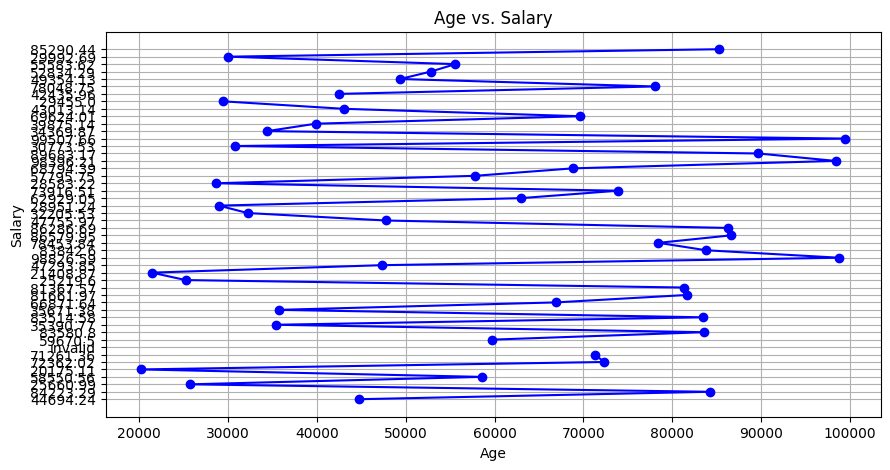

In [513]:
import matplotlib.pyplot as plt

# Create a simple line plot for 'Age' vs. 'Salary'
plt.figure(figsize=(10, 5))
plt.plot(df['Age'], df['Salary'], marker='o', linestyle='-', color='b')
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\3788399548.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Salary', data=df, ci=None)


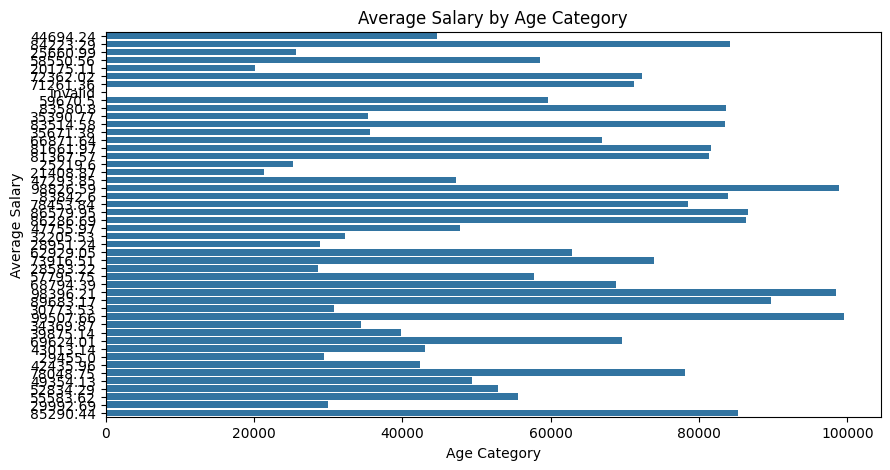

In [514]:
import seaborn as sns


# Create a bar plot for the average salary by 'Age Category'
plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='Salary', data=df, ci=None)
plt.title('Average Salary by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Salary')
plt.show()
